In [7]:
#
# Uses a simple surface simulator and waveform tracker to investigate
# effects of wave groups on retrieved wave heights. 
# First created in Matlab by F. Ardhuin     2021/09/15
# Adpatation to python:      M. de Carlo    2022/04/07
#

import matplotlib.pyplot as plt
import numpy as np
from simulator_functions import *
from altimetry_processing_functions import *
import warnings

warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

In [8]:
# In this first example we define the wave spectrum direcly on the kx,ky grid 
# that is the Fourier transform of the x,y grid we want for the sea surface

# X, Y : grid of wavenumbers = 2 * pi /wavelength
# steps : dkx and dky, with nx and ny values. dkx = 2*pi/(dx*nx)
# x, y : grid of real x,y : nx values with a dx step. 
noise= 0
## ---  physical surface definition
# size of simulated sea surface in x and y
nx = 2048
ny = 2048
dx = 10 # [m]
dy = 10 # [m]

## --- read_spectra
theta_m=90
D=2000
T0=16
Hs = 4

kp=2*np.pi/400;sx=kp*0.1;sy=sx;

Z1, kX, kY = def_spectrum_for_surface(nx=nx,ny=ny,dx=dx,dy=dy,theta_m=theta_m,D=D,T0=T0,Hs=Hs,
                         sk_theta=0.001,sk_k=0.001,typeSpec='Gaussian')

# Z1, kX, kY = def_spectrum_for_surface(nx=nx,ny=ny,dx=dx,dy=dy,theta_m=theta_m,D=D,T0=T0,
#                                       nk=1001,nth=36,klims=(0.0002,0.2),n=4,typeSpec='PM')

S1,x,y= surface_from_Z1kxky(Z1,kX,kY) # This function contains the random operator of phases

Gaussian spectrum selected. Available options:
 - Hs, sk_theta, sk_k. 
With (sk_k, sk_theta) the sigma values for the k-axis along the main direction and perpendicular to it respectively 
 Other options (common to all spectrum types) are : nx, ny, dx, dy, T0, theta_m, D
Hs for Gaussian :  3.999999999999996


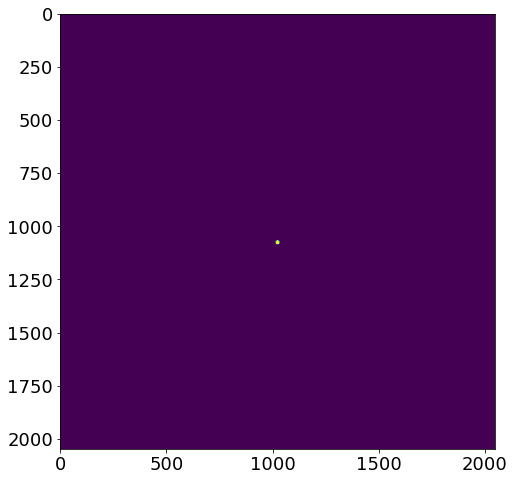

In [9]:
np.sum(Z1)
fig,ax=plt.subplots(figsize=(8,8))
plt.imshow(np.fliplr(np.transpose(Z1)),vmin=0, vmax=10000)


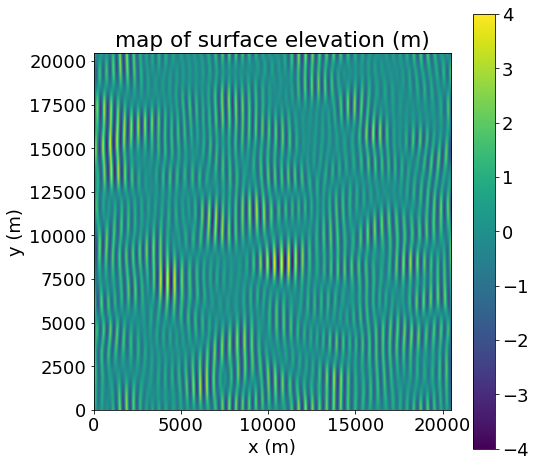

In [10]:
# For checking: let us now read matlab surface ... 
fig,ax=plt.subplots(figsize=(8,8))
img=plt.imshow(np.flipud(S1),vmin=-4, vmax=4,extent=[x[0],x[-1],y[0],y[-1]])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('map of surface elevation (m)')
fig.colorbar(img)

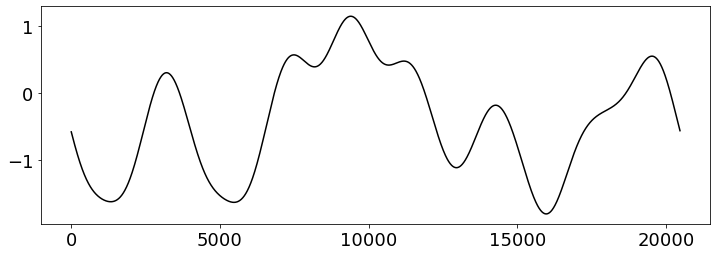

In [11]:
np.var(S1)
fig,ax=plt.subplots(figsize=(12,4))


plt.plot(x,S1[:,1023],'k-')

In [13]:
freq_satsampl=40 # freq for waveforms
v_sat=7000 # satellite velocity in m/s
alti_sat=519000 # altitude of satellite CFOSAT
radi = 4000     # radius used to compute waveform
radi1 = 900     # inner radius for Hs average
radi2 = 1200    # outer radius for Hs average
isplot_steps=0
# --- edges for range windows ------------
dr = 0.4
edges_max = 20

nHs=251
Hs_max = 25

wfm_ref, Hsm_ref, edges_ref = generate_wvform_database(dr,nHs,edges_max=edges_max,Hs_max=Hs_max,offset=10)

nxa=np.floor(radi/dx).astype(int) # size of radius of footprint in pixel
di=np.floor((v_sat/freq_satsampl)/dx).astype(int) # distance between footprint centers, in pixels (v_sat/freq_satsampl = dsitance in m)
nsamp=np.floor((nx-2*nxa)/di).astype(int) # Nb of samples

Hs_std,Hs_retrack,Xalt,waveforms,surf = fly_over_track_v0(x,y,S1,nsamp,nxa,di,wfm_ref,Hsm_ref,edges_ref,radi,radi1,radi2,alti_sat)


NameError: name 'Hsm' is not defined

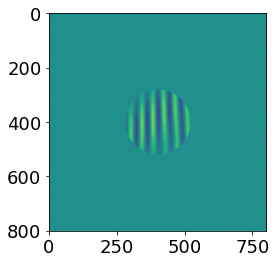

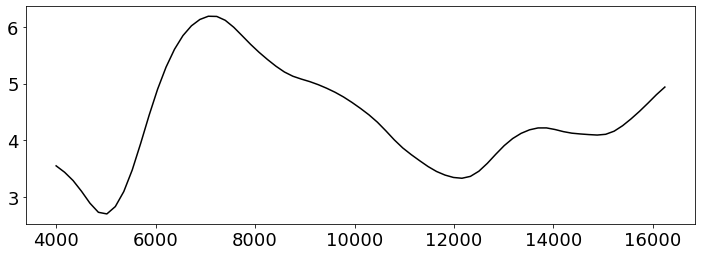

In [14]:
plt.imshow(np.flipud(surf),vmin=-4, vmax=4)

fig,ax=plt.subplots(figsize=(12,4))
plt.plot(Xalt,Hs_std,color='k',label='python')


2048 400 17 73 (73, 50) [4000.] [4000]


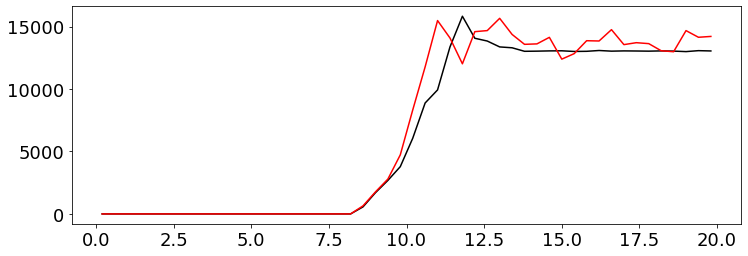

In [8]:
print(nx,nxa,di,nsamp,np.shape(waveforms),Xalt[0],Xaltm[0])
fig,ax=plt.subplots(figsize=(12,4))
plt.plot(edges_ref[0:-1]+dr/2,waveforms[0,:],color='k',label='python')


In [9]:
print(surf[400,400])

-1.4046004165665926


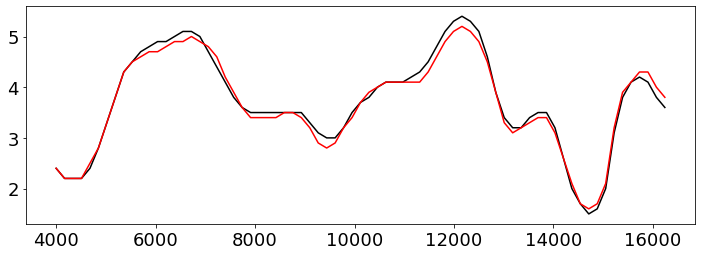

In [11]:
fig,ax=plt.subplots(figsize=(12,4))
plt.plot(Xalt, Hs_retrack, color='k',label='python')


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 